## Importing Libraries

In [1]:
import pandas as pd   
import matplotlib.pyplot as plt
import plotly.express as px
import time
import numpy as np
import warnings

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE,SelectFromModel


from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# the permutation based importance
import seaborn as sns
from sklearn.inspection import permutation_importance

from numpy import mean
import warnings
warnings.filterwarnings("ignore") 

## Loading Datase

In [2]:
# Importing Dataset using Pandas.
data = pd.read_csv("E:\DOWNLOADS\kidney_disease.csv")
data.shape  

(400, 26)

## Data Pre Processing

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
# Counting Number of Attrition.
dictribution = data["classification"].value_counts()
dictribution

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [6]:
# Replacing '/t' from classififcation column records.
data['classification'] = data['classification'].str.replace(r'\t', '')


In [7]:
# Counting Number of Attrition.
dictribution = data["classification"].value_counts()
dictribution

ckd       250
notckd    150
Name: classification, dtype: int64

In [8]:
# Cleaning columns and removing extra punctuations from numeric columns
data['pcv'] = data['pcv'].str.replace(r'?', '0')
data['wc'] = data['wc'].str.replace(r'?', '0')
data['rc'] = data['rc'].str.replace(r'?', '0')
data['dm'] = data['dm'].str.replace(r' ', '')

In [9]:
# now converting string columns into numeric after removing punctuations.
data['pcv'] = pd.to_numeric(data['pcv'])
data['wc'] = pd.to_numeric(data['wc'])
data['rc'] = pd.to_numeric(data['rc'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    float64
 17  wc              295 non-null    flo

In [11]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [12]:
# Checking Null values in all features.
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [13]:
#Finding the mean of the column having NaN
mean_value=data['age'].mean()
print(mean_value)

51.48337595907928


In [14]:
data['age'].fillna(value= 51, inplace=True)

In [15]:
#Finding the mean of the BP column having NaN
mean_value=data['bp'].mean()
print(mean_value)

76.46907216494846


In [16]:
data['bp'].fillna(value= 76, inplace=True)

In [17]:
#Finding the mean of the Specific Gravity column having NaN
mean_value=data['sg'].mean()
#print(mean_value)
data['sg'].fillna(value= mean_value, inplace=True)

#Finding the mean of the Albumin column having NaN
mean_value=data['al'].mean()
print(mean_value)
data['al'].fillna(value= mean_value, inplace=True)

#Finding the mean of the Sugar column having NaN
mean_value=data['su'].mean()
print(mean_value)
data['su'].fillna(value= mean_value, inplace=True)

#Finding the mean of the Blood Glucose Random column having NaN
mean_value=data['bgr'].mean()
print(mean_value)
data['bgr'].fillna(value= mean_value, inplace=True)

#Finding the mean of the Blood urea column having NaN
mean_value=data['bu'].mean()
print(mean_value)
data['bu'].fillna(value= mean_value, inplace=True)

#Finding the mean of the Serum Creatine column having NaN
mean_value=data['sc'].mean()
print(mean_value)
data['sc'].fillna(value= mean_value, inplace=True)

#Finding the mean of the Sodium column having NaN
mean_value=data['sod'].mean()
print(mean_value)
data['sod'].fillna(value= mean_value, inplace=True)

#Finding the mean of the Potassium column having NaN
mean_value=data['pot'].mean()
print(mean_value)
data['pot'].fillna(value= mean_value, inplace=True)

#Finding the mean of the Hemoglobin column having NaN
mean_value=data['hemo'].mean()
print(mean_value)
data['hemo'].fillna(value= mean_value, inplace=True)

#Finding the mean of the Packed Cell Volume column having NaN
mean_value=data['pcv'].mean()
print(mean_value)
data['pcv'].fillna(value= mean_value, inplace=True)

#Finding the mean of the White Blood Cells column having NaN
mean_value=data['wc'].mean()
print(mean_value)
data['wc'].fillna(value= mean_value, inplace=True)

#Finding the mean of the Red Blood cells column having NaN
mean_value=data['rc'].mean()
print(mean_value)
data['rc'].fillna(value= mean_value, inplace=True)

1.0169491525423728
0.45014245014245013
148.0365168539326
57.425721784776904
3.072454308093995
137.52875399361022
4.62724358974359
12.526436781609195
38.766666666666666
8377.627118644068
4.689999999999999


In [18]:
# Checking Null values in all features.
data.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [19]:
# Replacing null values if categorical columns with mode
mode_value=data['pc'].mode()[0]
data['pc'].fillna(value= mode_value, inplace=True)

mode_value=data['pcc'].mode()[0]
data['pcc'].fillna(value= mode_value, inplace=True)

mode_value=data['ba'].mode()[0]
data['ba'].fillna(value= mode_value, inplace=True)

mode_value=data['htn'].mode()[0]
data['htn'].fillna(value= mode_value, inplace=True)

mode_value=data['cad'].mode()[0]
data['cad'].fillna(value= mode_value, inplace=True)

mode_value=data['appet'].mode()[0]
data['appet'].fillna(value= mode_value, inplace=True)

mode_value=data['pe'].mode()[0]
data['pe'].fillna(value= mode_value, inplace=True)

mode_value=data['ane'].mode()[0]
data['ane'].fillna(value= mode_value, inplace=True)

mode_value=data['dm'].mode()[0]
data['dm'].fillna(value= mode_value, inplace=True)

In [20]:
# Checking Null values in all features.
data.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                  0
pcc                 0
ba                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [21]:
# Dropping unimpactful colums
data.drop('id',axis=1,inplace=True)
data.drop('rbc',axis=1,inplace=True)

## Exploratory Data Analysis

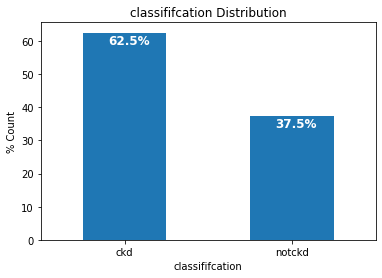

In [22]:
ax = (data['classification'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0)
ax.set_ylabel('% Count')
ax.set_xlabel('classififcation')
ax.set_ylabel('% Count')
ax.set_title('classififcation Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

From above distribution we can see that our problem in imbalanced class problems, as our class is not equally distributed.

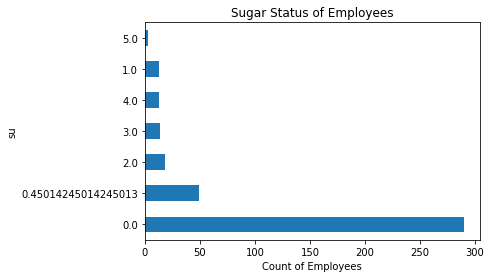

In [23]:
# Let's calculate the percentage of Martial Status of Employess.
data['su'].value_counts()

#plot the bar graph of categories
data['su'].value_counts().plot.barh()
plt.title("Sugar Status of Employees")
plt.xlabel("Count of Employees")
plt.ylabel("su")
plt.show()

Most of the records dont have sugar problems.

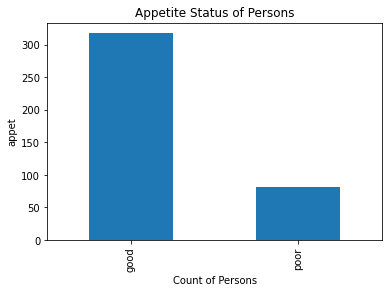

In [24]:
# Let's calculate the percentage of Martial Status of Employess.
data['appet'].value_counts()

#plot the bar graph of categories
data['appet'].value_counts().plot.bar()
plt.title("Appetite Status of Persons")
plt.xlabel("Count of Persons")
plt.ylabel("appet")
plt.show()

Most of the people in the dataset have good appetite.

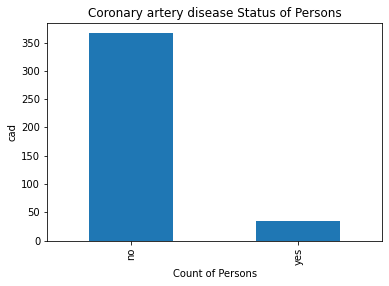

In [25]:
# Let's calculate the percentage of Martial Status of Employess.
data['cad'].value_counts()

#plot the bar graph of categories
data['cad'].value_counts().plot.bar()
plt.title("Coronary artery disease Status of Persons")
plt.xlabel("Count of Persons")
plt.ylabel("cad")
plt.show()

Around 40 people out of 400 are having Coronary artery disease.

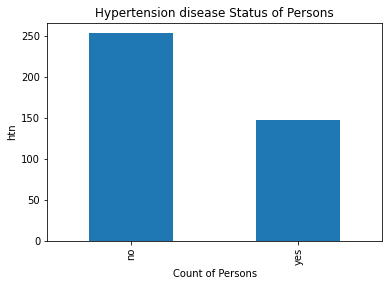

In [26]:
# Let's calculate the percentage of Martial Status of Employess.
data['htn'].value_counts()

#plot the bar graph of categories
data['htn'].value_counts().plot.bar()
plt.title("Hypertension disease Status of Persons")
plt.xlabel("Count of Persons")
plt.ylabel("htn")
plt.show()

150 People from 400 are having hypertension issues.

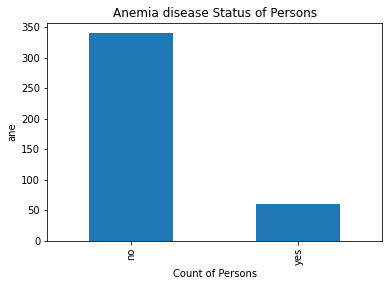

In [27]:
# Let's calculate the percentage of Martial Status of Employess.
data['ane'].value_counts()

#plot the bar graph of categories
data['ane'].value_counts().plot.bar()
plt.title("Anemia disease Status of Persons")
plt.xlabel("Count of Persons")
plt.ylabel("ane")
plt.show()

Around 50 people are having anemia disease.

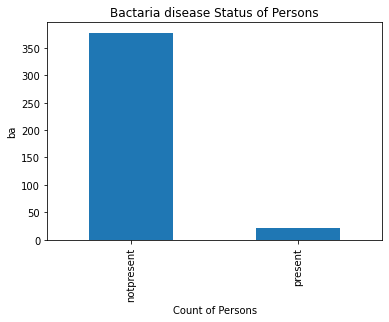

In [28]:
# Let's calculate the percentage of Martial Status of Employess.
data['ba'].value_counts()

#plot the bar graph of categories
data['ba'].value_counts().plot.bar()
plt.title("Bactaria disease Status of Persons")
plt.xlabel("Count of Persons")
plt.ylabel("ba")
plt.show()

Bacteria is present in very rare amount of people.

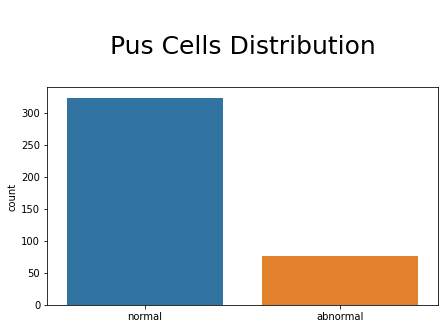

In [29]:
plt.figure(figsize=(7,4))
sns.countplot(data=data, x= data['pc'])
plt.title("\nPus Cells Distribution\n", fontsize=25)
plt.xlabel(None)
plt.show()

Pus cells distribution is usually normal amoung people.

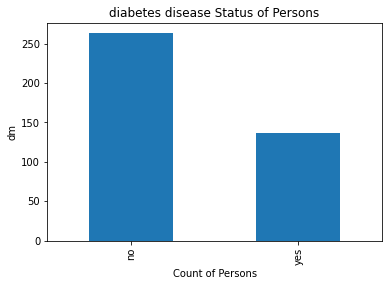

In [30]:
# Let's calculate the percentage of Martial Status of Employess.
data['dm'].value_counts()

#plot the bar graph of categories
data['dm'].value_counts().plot.bar()
plt.title("diabetes disease Status of Persons")
plt.xlabel("Count of Persons")
plt.ylabel("dm")
plt.show()

Around 30% people in the dataset has Diabetes disease.

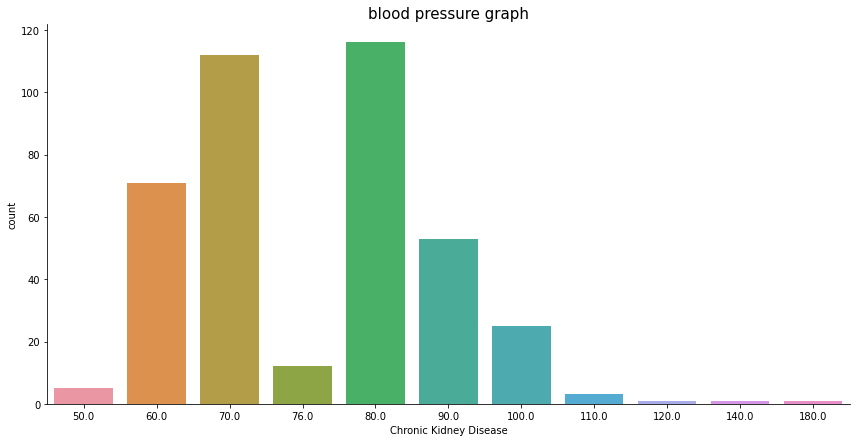

In [31]:
# blood pressure graph
sns.factorplot(data=data, x='bp', kind= 'count',size=6,aspect=2)
plt.xlabel('Chronic Kidney Disease')
plt.title("blood pressure graph",fontsize=15)
plt.show()

Most of people are having blood pressure 70 to 80.

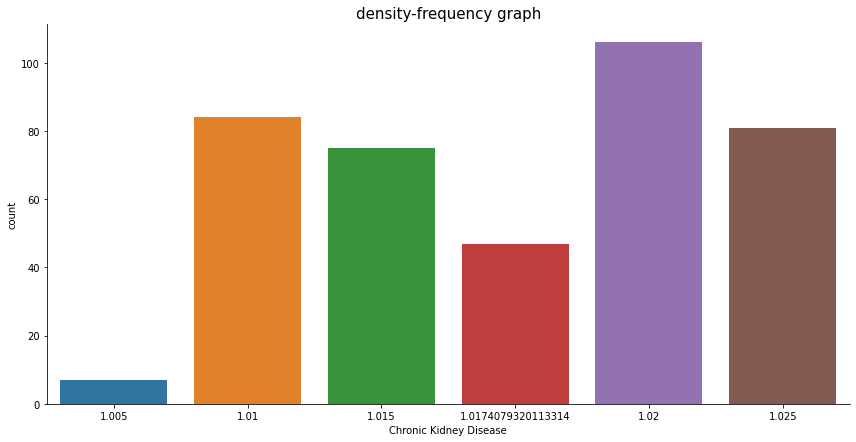

In [32]:
sns.factorplot(data=data, x='sg', kind= 'count',size=6,aspect=2)
plt.xlabel('Chronic Kidney Disease')
plt.title("density-frequency graph",fontsize=15)
plt.show()

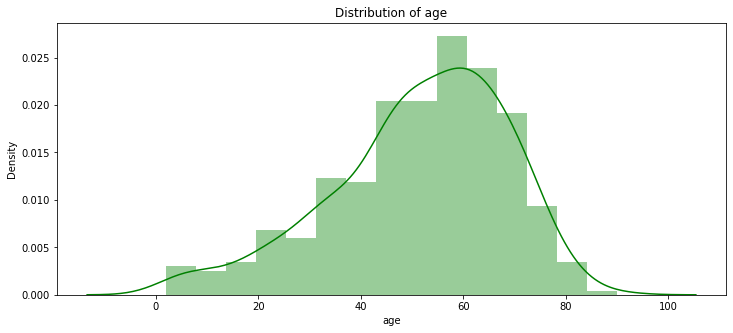

In [33]:
# Age Distribution
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

Most of the people in the dataset are having age around 60 years.

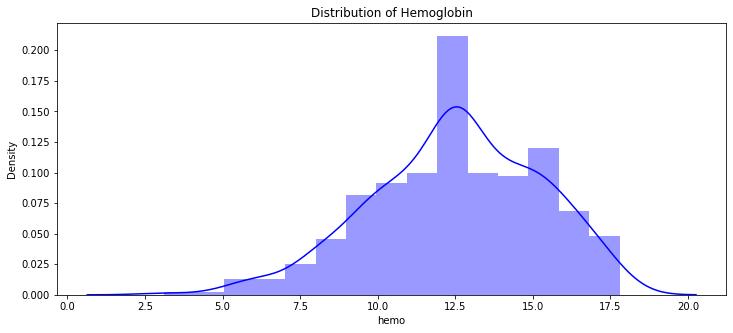

In [34]:
# Blood Pressure Distribution
plt.figure(figsize=(12,5))
plt.title("Distribution of Hemoglobin")
ax = sns.distplot(data["hemo"], color = 'b')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '50.0'),
  Text(1, 0, '60.0'),
  Text(2, 0, '70.0'),
  Text(3, 0, '76.0'),
  Text(4, 0, '80.0'),
  Text(5, 0, '90.0'),
  Text(6, 0, '100.0'),
  Text(7, 0, '110.0'),
  Text(8, 0, '120.0'),
  Text(9, 0, '140.0'),
  Text(10, 0, '180.0')])

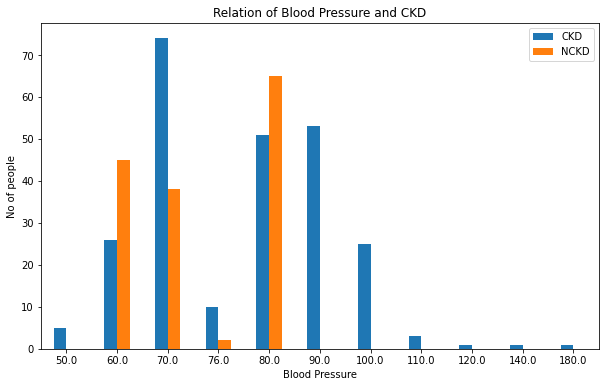

In [35]:
# Count of People left wrt Business functions.
pd.crosstab(data['bp'],data['classification']).plot(kind="bar",figsize=(10,6))
plt.title("Relation of Blood Pressure and CKD")
plt.xlabel("Blood Pressure")
plt.ylabel("No of people")
plt.legend(["CKD","NCKD"])
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'good'), Text(1, 0, 'poor')])

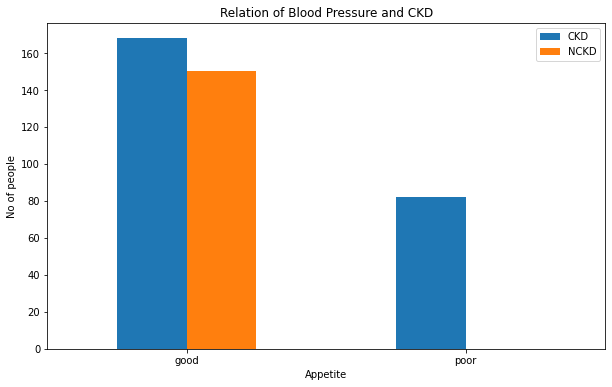

In [36]:
# Count of People left wrt Business functions.
pd.crosstab(data['appet'],data['classification']).plot(kind="bar",figsize=(10,6))
plt.title("Relation of Blood Pressure and CKD")
plt.xlabel("Appetite")
plt.ylabel("No of people")
plt.legend(["CKD","NCKD"])
plt.xticks(rotation=0)

The above bar plot shows that people with good appetite usually don't have chronic kidney disease but people with bad appetite are having disease.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

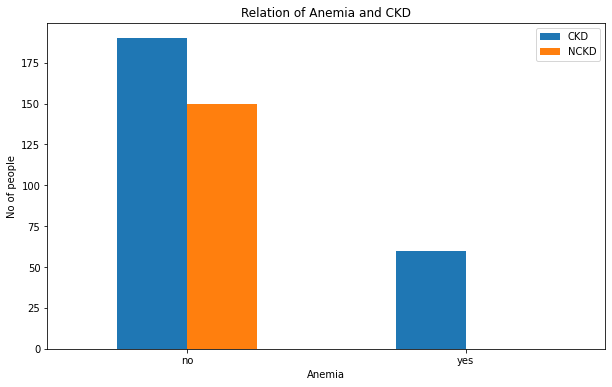

In [37]:
# Count of People left wrt Business functions.
pd.crosstab(data['ane'],data['classification']).plot(kind="bar",figsize=(10,6))
plt.title("Relation of Anemia and CKD")
plt.xlabel("Anemia")
plt.ylabel("No of people")
plt.legend(["CKD","NCKD"])
plt.xticks(rotation=0)

In [38]:
px.scatter(data, x="age", y="ane", color="classification")

The Above graphs shows that people with anemia disease most likely to have CKD as compare to group which dont have anemia.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

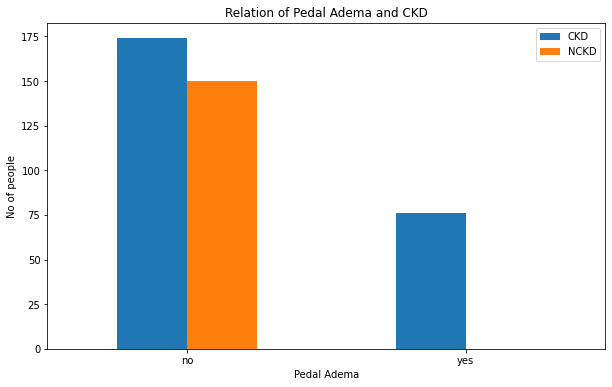

In [39]:
# Count of People left wrt Business functions.
pd.crosstab(data['pe'],data['classification']).plot(kind="bar",figsize=(10,6))
plt.title("Relation of Pedal Adema and CKD")
plt.xlabel("Pedal Adema")
plt.ylabel("No of people")
plt.legend(["CKD","NCKD"])
plt.xticks(rotation=0)

In [40]:
px.scatter(data, x="age", y="pe", color="classification")

The Above graphs show that people with pedal adema issue are most likely to have CKD.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

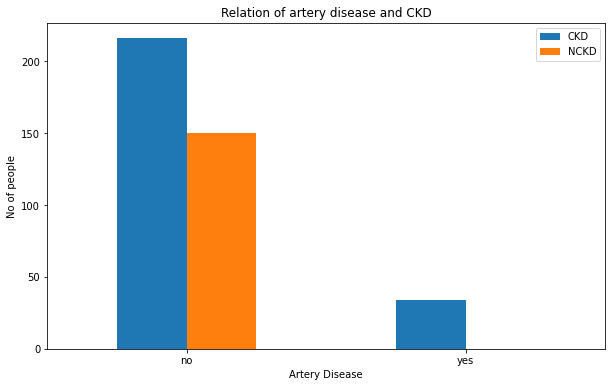

In [41]:
# Count of People left wrt Business functions.
pd.crosstab(data['cad'],data['classification']).plot(kind="bar",figsize=(10,6))
plt.title("Relation of artery disease and CKD")
plt.xlabel("Artery Disease")
plt.ylabel("No of people")
plt.legend(["CKD","NCKD"])
plt.xticks(rotation=0)

In [42]:
px.scatter(data, x="age", y="cad", color="classification")

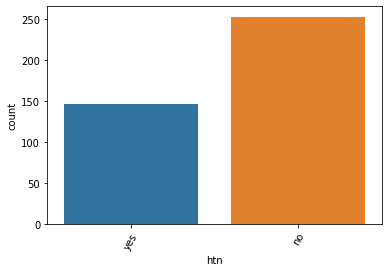

In [43]:
import seaborn as sns
sns.countplot(x=data['htn'])
plt.xticks(rotation=60)
plt.show()

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

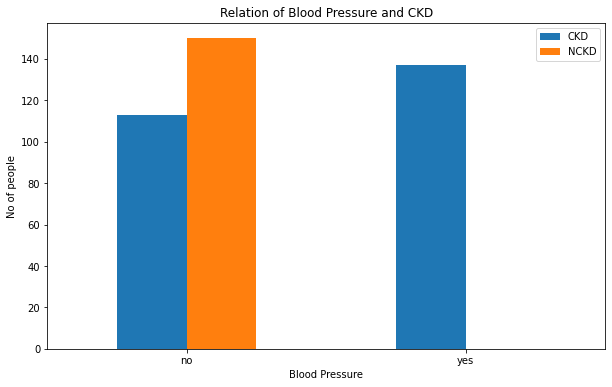

In [44]:
# Count of People left wrt Business functions.
pd.crosstab(data['dm'],data['classification']).plot(kind="bar",figsize=(10,6))
plt.title("Relation of Blood Pressure and CKD")
plt.xlabel("Blood Pressure")
plt.ylabel("No of people")
plt.legend(["CKD","NCKD"])
plt.xticks(rotation=0)

Above graph shows that most of the people have Blood Pressure Disease are also have Chronic Kidney Disease

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

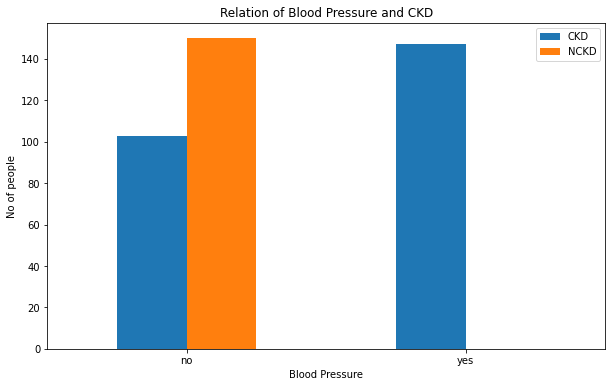

In [45]:
# Count of People left wrt Business functions.
pd.crosstab(data['htn'],data['classification']).plot(kind="bar",figsize=(10,6))
plt.title("Relation of Blood Pressure and CKD")
plt.xlabel("Blood Pressure")
plt.ylabel("No of people")
plt.legend(["CKD","NCKD"])
plt.xticks(rotation=0)

In [46]:
px.scatter(data, x="age", y="appet", color="classification")

In [47]:
px.scatter(data, x="age", y="bp", color="classification")

In [48]:
px.scatter( data, x="age", y="hemo", color="classification", marginal_y="violin", marginal_x="box")

The People with Low HemoGlobin Level are likely to have CKD.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.45014245014245013'),
  Text(2, 0, '1.0'),
  Text(3, 0, '2.0'),
  Text(4, 0, '3.0'),
  Text(5, 0, '4.0'),
  Text(6, 0, '5.0')])

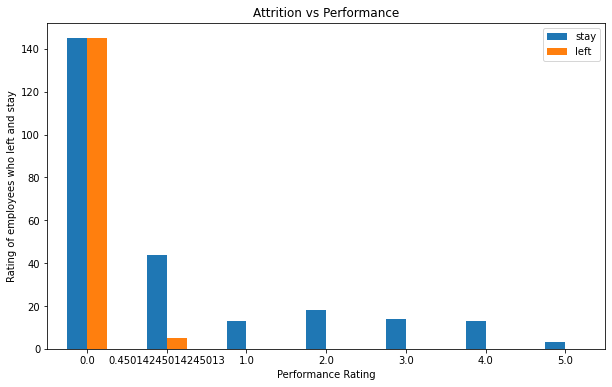

In [49]:
# Count of People left wrt Ratings.
pd.crosstab(data['su'],data['classification']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Performance")
plt.xlabel("Performance Rating")
plt.ylabel("Rating of employees who left and stay")
plt.legend(["stay","left"])
plt.xticks(rotation=0)

In [50]:
px.scatter(data, x="age", y="su", color="classification")

The Above graphs show that people having high sugar level are most likely to have kidney disease.

(array([0, 1]), [Text(0, 0, 'abnormal'), Text(1, 0, 'normal')])

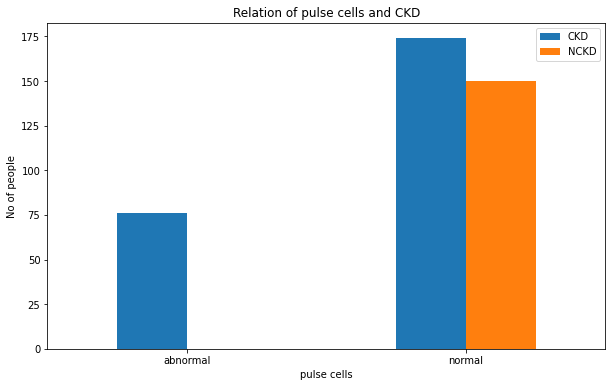

In [51]:
# Count of People left wrt Business functions.
pd.crosstab(data['pc'],data['classification']).plot(kind="bar",figsize=(10,6))
plt.title("Relation of pulse cells and CKD")
plt.xlabel("pulse cells")
plt.ylabel("No of people")
plt.legend(["CKD","NCKD"])
plt.xticks(rotation=0)

People with normal level of Pulse cells are unlikely to have CKD.

## Encoding

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   pc              400 non-null    object 
 6   pcc             400 non-null    object 
 7   ba              400 non-null    object 
 8   bgr             400 non-null    float64
 9   bu              400 non-null    float64
 10  sc              400 non-null    float64
 11  sod             400 non-null    float64
 12  pot             400 non-null    float64
 13  hemo            400 non-null    float64
 14  pcv             400 non-null    float64
 15  wc              400 non-null    float64
 16  rc              400 non-null    float64
 17  htn             400 non-null    obj

In [53]:
data['pc'].unique()

array(['normal', 'abnormal'], dtype=object)

In [54]:
data['pc'] = data['pc'].map({'normal': 0, 'abnormal': 1})
data['pc'] = pd.to_numeric(data['pc'])

In [55]:
data['pcc'].unique()

array(['notpresent', 'present'], dtype=object)

In [56]:
data['pcc'] = data['pcc'].map({'notpresent': 0, 'present': 1})
data['pcc'] = pd.to_numeric(data['pcc'])

In [57]:
data['ba'].unique()

array(['notpresent', 'present'], dtype=object)

In [58]:
data['ba'] = data['pcc'].map({'notpresent': 0, 'present': 1})
data['ba'] = pd.to_numeric(data['ba'])

In [59]:
data['htn'] = data['htn'].map({'no': 0, 'yes': 1})
data['htn'] = pd.to_numeric(data['htn'])

data['dm'] = data['dm'].map({'no': 0, 'yes': 1})
data['dm'] = pd.to_numeric(data['dm'])

data['cad'] = data['cad'].map({'no': 0, 'yes': 1})
data['cad'] = pd.to_numeric(data['cad'])

data['appet'] = data['appet'].map({'good': 1, 'poor': 0})
data['appet'] = pd.to_numeric(data['appet'])

data['pe'] = data['pe'].map({'no': 0, 'yes': 1})
data['pe'] = pd.to_numeric(data['pe'])

data['ane'] = data['ane'].map({'no': 0, 'yes': 1})
data['ane'] = pd.to_numeric(data['ane'])

data['classification'] = data['classification'].map({'notckd': 0, 'ckd': 1})
data['classification'] = pd.to_numeric(data['classification'])

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   pc              400 non-null    int64  
 6   pcc             400 non-null    int64  
 7   ba              0 non-null      float64
 8   bgr             400 non-null    float64
 9   bu              400 non-null    float64
 10  sc              400 non-null    float64
 11  sod             400 non-null    float64
 12  pot             400 non-null    float64
 13  hemo            400 non-null    float64
 14  pcv             400 non-null    float64
 15  wc              400 non-null    float64
 16  rc              400 non-null    float64
 17  htn             400 non-null    int

In [61]:
# Checking Null values in all features.
data.isnull().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
pc                  0
pcc                 0
ba                400
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [62]:
data.drop('ba',axis=1,inplace=True)

## Train - Test Split

In [63]:
X = data.loc[:, data.columns != 'classification']
y = data[['classification']]

In [64]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(280, 22)
(280, 1)
(120, 22)
(120, 1)


In [65]:
features = trainX.columns
print(features)

Index(['age', 'bp', 'sg', 'al', 'su', 'pc', 'pcc', 'bgr', 'bu', 'sc', 'sod',
       'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe',
       'ane'],
      dtype='object')


## Machine Learning Models

### Logistic Regression

[0.96428571 1.         1.         1.         0.92857143 0.96428571
 0.96428571 0.96428571 1.         0.92857143]
Accuracy Logistic Regression KFold with k=10: 97.14%
[[105   3]
 [  5 167]]


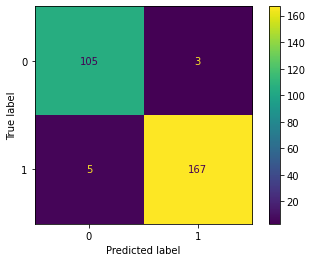

In [66]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

lr = LogisticRegression(solver='liblinear',random_state=2)
results_kfold = cross_val_score(lr, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy Logistic Regression KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(lr, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [67]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(trainX,trainy.values.ravel())
y_pred = lr.predict(testX)

Confusion Matrix:
[[41  1]
 [ 2 76]]
------------------------------------
AUC Score: 0.9752747252747253
------------------------------------
Accuracy of Logistic Regression: 97.5 %
------------------------------------
Recall: 0.9743589743589743
------------------------------------
Precision: 0.987012987012987
------------------------------------
Specificity: 0.9761904761904762
------------------------------------
Sensitivity: 0.9743589743589743
------------------------------------
Miss Rate (False Positive Rate): 0.023809523809523808
------------------------------------
Miss Rate (False Negative Rate): 0.02564102564102564
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        78

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



Text(0.5, 1.0, 'Contribution of features in Model Performance')

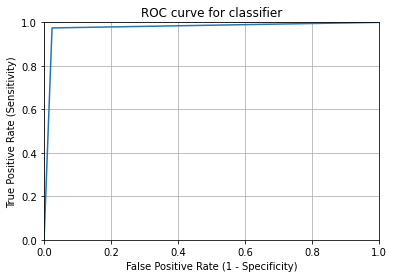

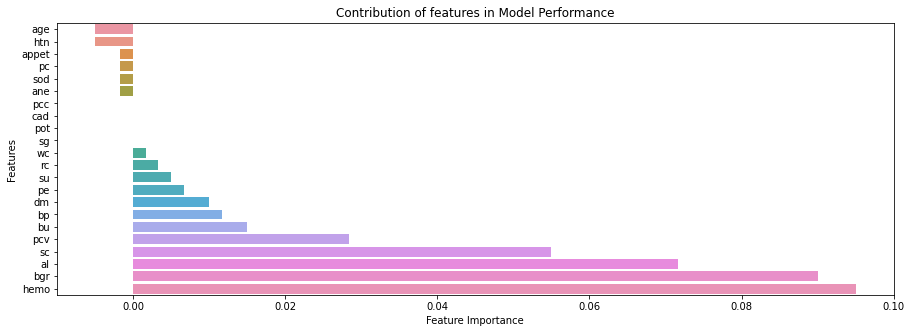

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = lr.score(testX, testy)
print("Accuracy of Logistic Regression:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

from sklearn.metrics import classification_report
print(classification_report(testy,y_pred))

from sklearn import metrics
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

perm_importance = permutation_importance(lr, testX, testy)
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")


### Decision Tree Classifier

[0.96428571 1.         1.         0.89285714 0.96428571 0.96428571
 1.         0.92857143 1.         0.89285714]
Accuracy of DECISION TREE KFold with k=10: 96.07%
[[102   6]
 [  6 166]]


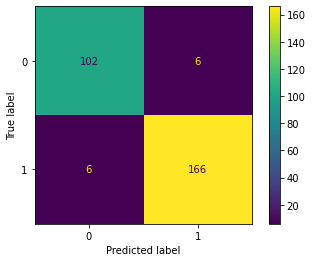

In [69]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

DT = DecisionTreeClassifier(max_depth=200)
results_kfold = cross_val_score(DT, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of DECISION TREE KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(DT, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [70]:
DT = DecisionTreeClassifier(max_depth=100)
DT.fit(trainX,trainy)
y_pred = DT.predict(testX) 

Confusion Matrix:
[[41  1]
 [ 2 76]]
------------------------------------
AUC Score: 0.9752747252747253
------------------------------------
Accuracy of Decision Tree: 97.5 %
------------------------------------
Recall: 0.9743589743589743
------------------------------------
Precision: 0.987012987012987
------------------------------------
Specificity: 0.9761904761904762
------------------------------------
Sensitivity: 0.9743589743589743
------------------------------------
Miss Rate (False Positive Rate): 0.023809523809523808
------------------------------------
Miss Rate (False Negative Rate): 0.02564102564102564


Text(0.5, 1.0, 'Contribution of features in Model Performance')

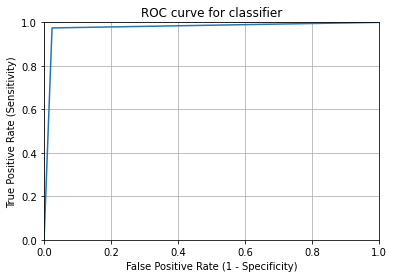

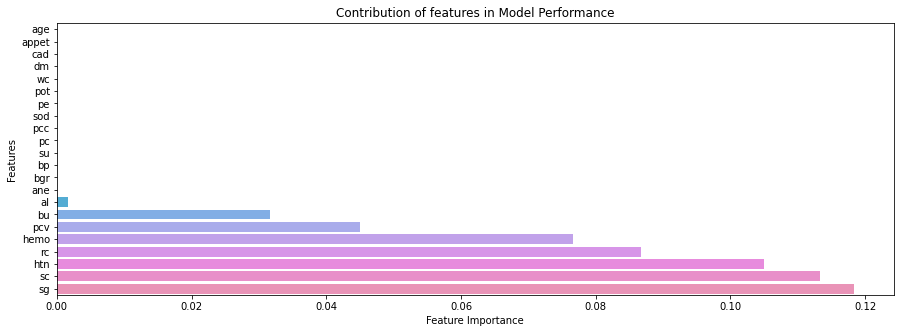

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = DT.score(testX, testy)
print("Accuracy of Decision Tree:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

from sklearn import metrics
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

perm_importance = permutation_importance(DT, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Random Forest Classifier

[1.         1.         1.         1.         1.         0.96428571
 1.         0.96428571 1.         0.92857143]
Accuracy of Random Forest KFold with k=10: 98.57%
[[106   2]
 [  2 170]]


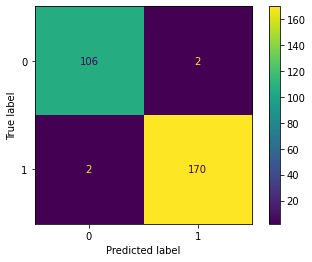

In [72]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

rf = RandomForestClassifier(max_depth=10,n_estimators = 1200)
results_kfold = cross_val_score(rf, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of Random Forest KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(rf, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [73]:
rf = RandomForestClassifier(max_depth=10,n_estimators = 1200)
rf.fit(trainX,trainy.values.ravel())
y_pred = rf.predict(testX)

Confusion Matrix:
[[42  0]
 [ 0 78]]
------------------------------------
AUC Score: 1.0
------------------------------------
Accuracy of Random Forest: 100.0 %
------------------------------------
Recall: 1.0
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 1.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        78

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Features which are contributing in Model


Text(0.5, 1.0, 'Contribution of features in Model Performance')

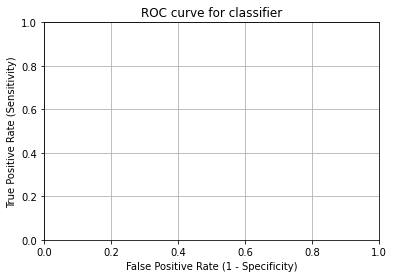

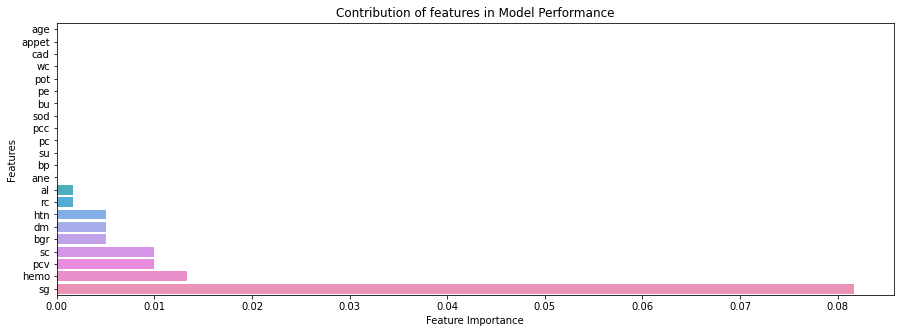

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = rf.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


print(classification_report(testy,y_pred))
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)



print("Features which are contributing in Model")
perm_importance = permutation_importance(rf, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### KNN Classifier

[0.64285714 0.78571429 0.75       0.75       0.75       0.60714286
 0.85714286 0.53571429 0.64285714 0.60714286]
Accuracy of KNN KFold with k=10: 69.29%
[[ 81  27]
 [ 61 111]]


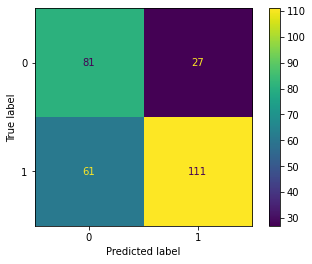

In [75]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

knn = KNeighborsClassifier(n_neighbors=5)
results_kfold = cross_val_score(knn, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of KNN KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(knn, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [76]:
#Note: .values.ravel( ) is used to eliminate dataconversion warning.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trainX,trainy.values.ravel())
y_pred = knn.predict(testX)

Confusion Matrix:
[[37  5]
 [22 56]]
------------------------------------
AUC Score: 0.7994505494505495
------------------------------------
Accuracy of KNN Classifier: 77.5 %
------------------------------------
Recall: 0.717948717948718
------------------------------------
Precision: 0.9180327868852459
------------------------------------
Specificity: 0.8809523809523809
------------------------------------
Sensitivity: 0.717948717948718
------------------------------------
Miss Rate (False Positive Rate): 0.11904761904761904
------------------------------------
Miss Rate (False Negative Rate): 0.28205128205128205
              precision    recall  f1-score   support

           0       0.63      0.88      0.73        42
           1       0.92      0.72      0.81        78

    accuracy                           0.78       120
   macro avg       0.77      0.80      0.77       120
weighted avg       0.82      0.78      0.78       120



Text(0.5, 1.0, 'Contribution of features in Model Performance')

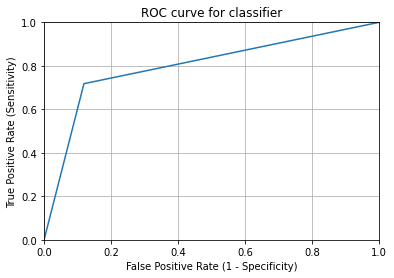

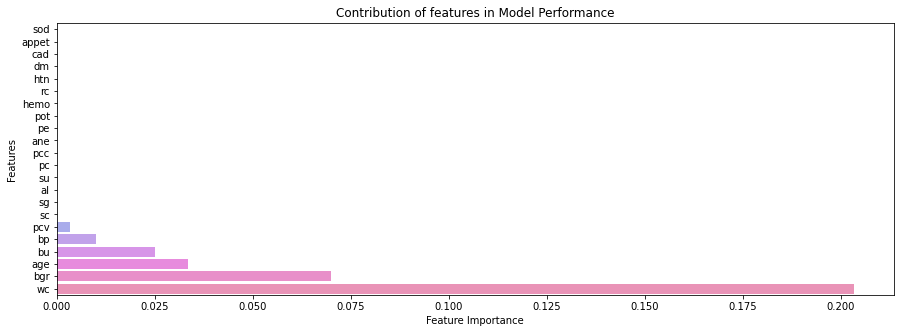

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = knn.score(testX, testy)
print("Accuracy of KNN Classifier:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


perm_importance = permutation_importance(knn, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

### Gradient Boosting Classifier

[1.         1.         1.         0.89285714 1.         0.92857143
 0.92857143 0.92857143 0.96428571 0.96428571]
Accuracy of Gradient Boosting KFold with k=10: 96.07%
[[101   7]
 [  6 166]]


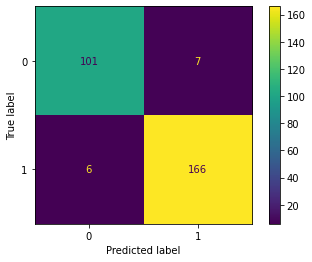

In [78]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=400)
results_kfold = cross_val_score(gb, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of Gradient Boosting KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(gb, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [79]:
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=400)
gb.fit(trainX,trainy.values.ravel())
y_pred = gb.predict(testX)

Confusion Matrix:
[[42  0]
 [ 1 77]]
------------------------------------
AUC Score: 0.9935897435897436
------------------------------------
Accuracy of Random Forest: 99.16666666666667 %
------------------------------------
Recall: 0.9871794871794872
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 0.9871794871794872
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.01282051282051282
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.99      0.99        78

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



Text(0.5, 1.0, 'Contribution of features in Model Performance')

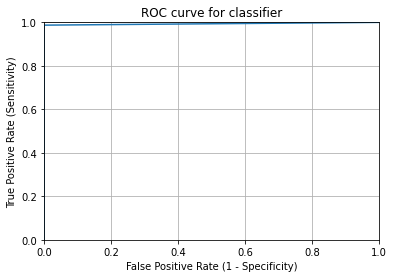

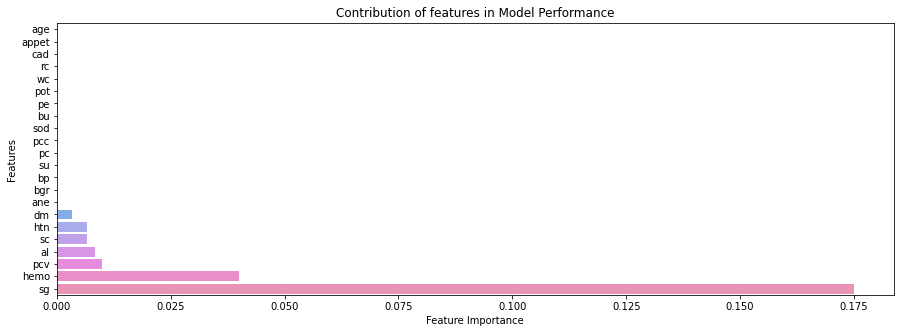

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = gb.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)

print(classification_report(testy,y_pred))

perm_importance = permutation_importance(gb, testX, testy)



miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

## Applying Sequential Feature Selector for Feature Selection

In [81]:
rf_w = RandomForestClassifier(random_state=100, n_estimators=50)
rf_w.fit(trainX, trainy)

RandomForestClassifier(n_estimators=50, random_state=100)

<AxesSubplot:xlabel='Features', ylabel='Importances'>

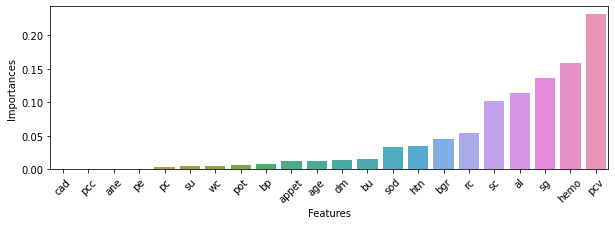

In [82]:
import seaborn as sns
# get the importance of the resulting features.
importances = rf_w.feature_importances_
# create a data frame for visualization.
final_df = pd.DataFrame({"Features": trainX.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')

# plot the feature importances in bars.
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sns.barplot(x="Features",y= "Importances", data=final_df)

In [83]:
model_tree = RandomForestClassifier(n_estimators=100,random_state=42)

# use RFE to eleminate the less importance features
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=9, step=1)    # Selecting 9 imporatant Features.
X_train_rfe_tree = sel_rfe_tree.fit_transform(trainX, trainy)
print(sel_rfe_tree.get_support())
print(sel_rfe_tree.ranking_)

[False False  True  True False False False  True False  True False False
  True  True False  True  True  True False False False False]
[ 5  6  1  1 10  8 12  1  2  1  3 11  1  1  4  1  1  1 14  7  9 13]


In [84]:
# These are the important features after RFE.
selected_cols = [column for column in trainX.columns if column in trainX.columns[sel_rfe_tree.get_support()]]
selected_cols

['sg', 'al', 'bgr', 'sc', 'hemo', 'pcv', 'rc', 'htn', 'dm']

## Applying Model After Sequetial Feature Selection

In [85]:
#Adding all imporatant features after RFE in X variable.
X = data[['sg', 'al', 'bgr', 'sc', 'hemo', 'pcv', 'rc', 'htn', 'dm']]
y = data[['classification']]              # Target Variable.

In [86]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=2)
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

(280, 9)
(280, 1)
(120, 9)
(120, 1)


### Random Forest (After Feature Selection)

[1.         1.         1.         1.         1.         0.96428571
 1.         1.         1.         0.92857143]
Accuracy of Random Forest KFold with k=10: 98.93%
[[107   1]
 [  2 170]]


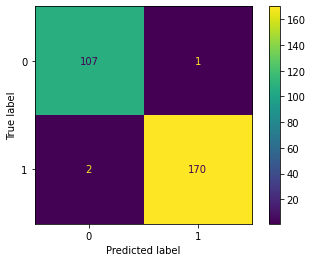

In [87]:
# K - FOLD Cross Validation.

kfold = KFold(n_splits=5, random_state=100, shuffle=True)

rf = RandomForestClassifier(max_depth=10,n_estimators = 1200)
results_kfold = cross_val_score(rf, trainX, trainy.values.ravel(), cv=10)
print(results_kfold)
print("Accuracy of Random Forest KFold with k=10: %.2f%%" % (results_kfold.mean()*100.0))


pred = cross_val_predict(rf, trainX, trainy.values.ravel(), cv=5)
conf_mat = confusion_matrix(trainy, pred)
print(conf_mat)
disp = ConfusionMatrixDisplay.from_predictions(trainy,pred)

In [88]:
rf = RandomForestClassifier(max_depth=10,n_estimators = 1200)
rf.fit(trainX,trainy.values.ravel())
y_pred = rf.predict(testX)

Confusion Matrix:
[[42  0]
 [ 0 78]]
------------------------------------
AUC Score: 1.0
------------------------------------
Accuracy of Random Forest: 100.0 %
------------------------------------
Recall: 1.0
------------------------------------
Precision: 1.0
------------------------------------
Specificity: 1.0
------------------------------------
Sensitivity: 1.0
------------------------------------
Miss Rate (False Positive Rate): 0.0
------------------------------------
Miss Rate (False Negative Rate): 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        78

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Features which are contributing in Model


Text(0.5, 1.0, 'Contribution of features in Model Performance')

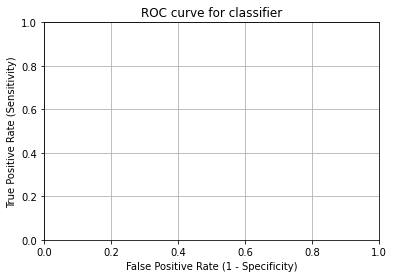

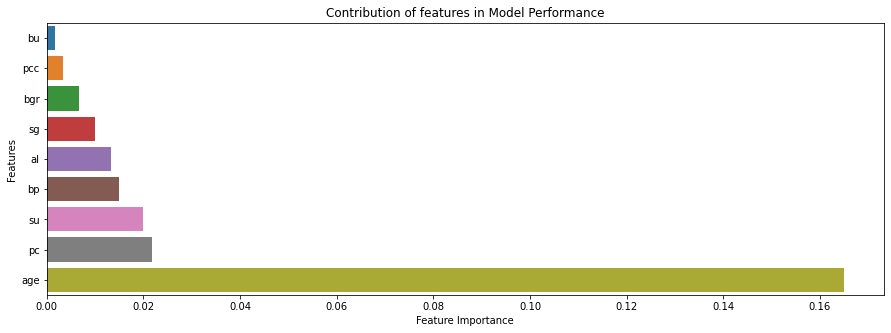

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy,y_pred)
print("Confusion Matrix:")
print(cm)
print('------------------------------------')

AUC_Score = roc_auc_score(testy,y_pred)
print("AUC Score:",AUC_Score)
print('------------------------------------')


accuracy = rf.score(testX, testy)
print("Accuracy of Random Forest:",accuracy*100,"%")
print('------------------------------------')


from sklearn.metrics import recall_score
recall = recall_score(testy,y_pred)
print("Recall:",recall)
print('------------------------------------')

from sklearn.metrics import precision_score
precision = precision_score(testy,y_pred)
print("Precision:",precision)
print('------------------------------------')

specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity:", specificity)
print('------------------------------------')

sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity:", sensitivity)

print('------------------------------------')
miss_rate = cm[0,1]/(cm[0,1]+cm[0,0])
print("Miss Rate (False Positive Rate):", miss_rate)

print('------------------------------------')
miss_rate_FNR = cm[1,0]/(cm[1,0]+cm[1,1])
print("Miss Rate (False Negative Rate):", miss_rate_FNR)


print(classification_report(testy,y_pred))
miss_rate, sensitivity, thresholds = metrics.roc_curve(testy, y_pred)
plt.plot(miss_rate, sensitivity)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)



print("Features which are contributing in Model")
perm_importance = permutation_importance(rf, testX, testy)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,5))
sns.barplot(y = features[sorted_idx], x = perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Contribution of features in Model Performance")

So, we are getting our best performance using random forest classifier. So we will deploy this model for our prediction webapp.

In [90]:
# Exporting Random Forest Model.
import pickle
pickle_out = open("E:/random_forest.pkl","wb")
pickle.dump(rf, pickle_out)
pickle_out.close()